In [1]:
import numpy as np 
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

from miniml.minisvm import *

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Dataset

In [2]:
train = pd.read_csv('./datasets/digit-recognizer/train.csv')
training_data = pd.read_csv('./datasets/digit-recognizer/train.csv')

display(train.head())
train_label = train['label']
train = train.drop(['label'], axis=1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


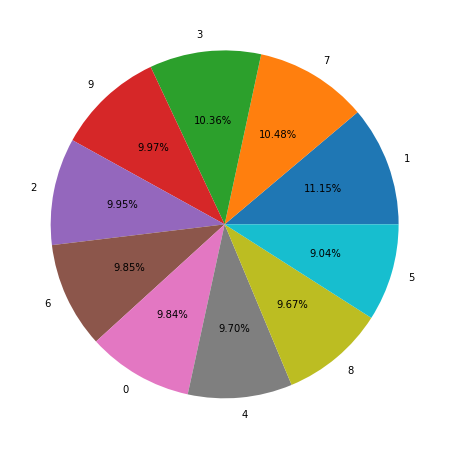

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))
_ = ax.pie(train_label.value_counts().values, 
       labels=train_label.value_counts().index, 
       autopct='%1.2f%%', 
       textprops={'fontsize': 10})

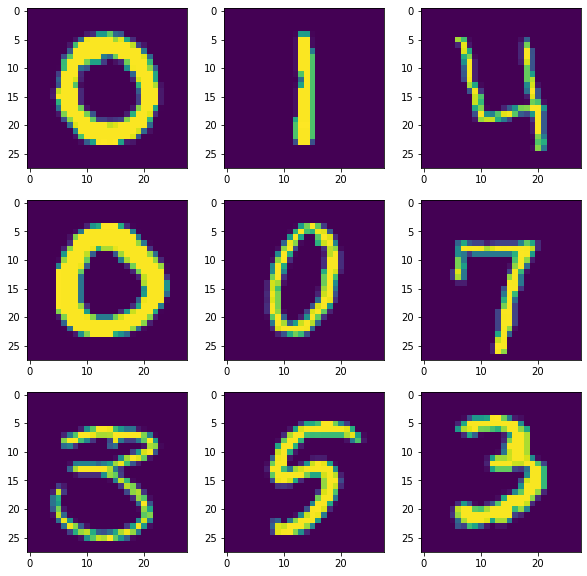

In [4]:
side_length = int(np.sqrt(train.shape[1]))

plt.figure(figsize=(10, 10))

for i in range(1, 10):    
    plt.subplot(3, 3, i)
    plt.imshow(np.array(train.iloc[i]).reshape(side_length, side_length))

## Data Split

In [5]:
X = np.array(train[:400])
y = np.array(train_label[:400])

# reshape from 28*28 to 14*14
reshaped_X = []
for x in X:
    reshaped_X.append(np.array(Image.fromarray(x.reshape(28,28).astype(np.uint8)).resize((14,14))).flatten())
reshaped_X = np.array(reshaped_X)

X = reshaped_X / 255.0
# split our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=13)
print(X_train.shape, X_test.shape)

(320, 196) (80, 196)


## My SVM Version

In my implementation, SMO is implemented with randomly chosen points, which lead to not stable results between each running.

In [6]:
my_svc = MultiSVC(y_train, X_train)
params = my_svc.fit(max_epoch=10, kernel='linear')

X_prediction = my_svc.predict(X_test)

In [7]:
print(f'{classification_report(y_test, X_prediction)}')

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       0.67      0.91      0.77        11
           2       1.00      0.67      0.80        12
           3       0.80      0.57      0.67         7
           4       1.00      0.50      0.67         6
           5       1.00      0.33      0.50         6
           6       0.75      0.86      0.80         7
           7       0.58      1.00      0.74         7
           8       0.50      0.83      0.62         6
           9       0.88      0.58      0.70        12

    accuracy                           0.73        80
   macro avg       0.78      0.73      0.71        80
weighted avg       0.80      0.72      0.72        80



In [8]:
confusion_matrix(y_test, X_prediction)

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 2,  0,  8,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  4,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  2,  0,  1],
       [ 0,  1,  0,  0,  0,  2,  1,  0,  2,  0],
       [ 1,  0,  0,  0,  0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  5,  0],
       [ 0,  2,  0,  0,  0,  0,  1,  2,  0,  7]], dtype=int64)

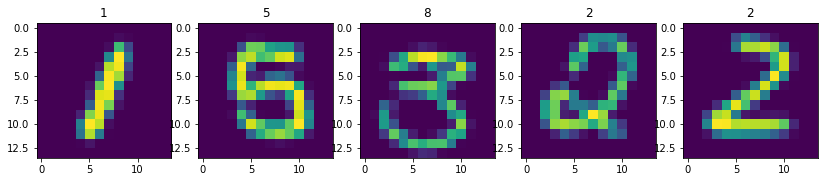

In [9]:
side_length = int(np.sqrt(X.shape[1]))

plt.figure(figsize=(14, 5))

for i in range(1, 6):    
    plt.subplot(1, 5, i)
    plt.imshow(np.array(X_test[i]).reshape(side_length, side_length))
    plt.title(X_prediction[i])

## Sklearn SVM Version

In [10]:
SVM = svm.SVC(gamma=0.01, kernel='linear')
SVM.fit(X_train, y_train) 

X_prediction = SVM.predict(X_test)

In [11]:
print(f'{classification_report(y_test, X_prediction)}')

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      1.00      1.00        11
           2       0.80      0.67      0.73        12
           3       0.57      0.57      0.57         7
           4       0.83      0.83      0.83         6
           5       1.00      0.67      0.80         6
           6       1.00      0.86      0.92         7
           7       0.88      1.00      0.93         7
           8       0.86      1.00      0.92         6
           9       0.83      0.83      0.83        12

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.83        80
weighted avg       0.85      0.84      0.84        80



In [12]:
confusion_matrix(y_test, X_prediction)

array([[ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  8,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  4,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  1],
       [ 0,  0,  1,  1,  0,  4,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1,  0, 10]], dtype=int64)

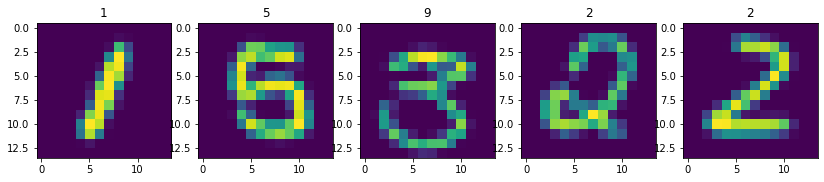

In [13]:
side_length = int(np.sqrt(X.shape[1]))

plt.figure(figsize=(14, 5))

for i in range(1, 6):    
    plt.subplot(1, 5, i)
    plt.imshow(np.array(X_test[i]).reshape(side_length, side_length))
    plt.title(X_prediction[i])

**Reference**

https://www.kaggle.com/code/utsavsavaliya/digit-recognizer-solution/notebook